Gambler Problem:
A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends
when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite
 The state is the gambler’s capital, s 2 {1, 2,..., 99} and the actions
are stakes, a 2 {0, 1,..., min(s, 100
s)}. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.
The state-value function then gives
the probability of winning from each
state. A policy is a mapping from
levels of capital to stakes. The optimal policy maximizes the probability
of reaching the goal. Let ph denote
the probability of the coin coming up
heads. If ph is known, then the entire problem is known and it can be
solved, for instance, by value iteration. ## copied from a RL book 

In [548]:
ph = 0.4

In [549]:
states = list(range(1, 100))

In [550]:
terminal_states = [0 , 100]

In [551]:
V = {}

In [552]:
V[0] = 0

In [553]:
V[100] = 0

In [554]:
gamma = 1

In [555]:
## rewards
R = {}
R[0] = 0
R[100] = +1
for s in states:
    R.update({s : 0})

In [556]:
## Initial Policy - Betting everything we have
P = {}
for s in states:
    P.update({s :  min(s, 100 - s)})

In [557]:
def initialise_values(V, states):
    for s in states:
        V.update({s : 0})
    return V

In [558]:
def get_possible_actions(state):
    return list(range(1, min(state, 100 - state) + 1))

In [559]:
def policy_evaluation(V, P, R, states, ph, gamma):
    for s in states:
        V[s] = ph * (R[s + P[s]] + gamma * V[s + P[s]]) + (1- ph) * (R[s - P[s]] + gamma * V[s - P[s]])
    return V

In [560]:
gamma = 1

In [561]:
def calculate_delta(V_old, V, states):
    diff = []
    for state in states:
        diff.append(abs(V[state] - V_old[state]))
    return max(diff)

In [562]:
import copy

In [563]:
V = initialise_values(V, states)
delta = 1
deta_threshold = 0.01
iteration = 0
while delta > deta_threshold:
    iteration += 1
    V_old = copy.deepcopy(V)
    V = policy_evaluation(V, P, R, states, ph, gamma)
    delta = calculate_delta(V_old, V, states)
    print(iteration, delta)

1 0.9533440000000001
2 0.36889600000000006
3 0.13926400000000003
4 0.055705600000000015
5 0.02228224000000001
6 0.008912896000000003


In [564]:
import matplotlib.pyplot as plt

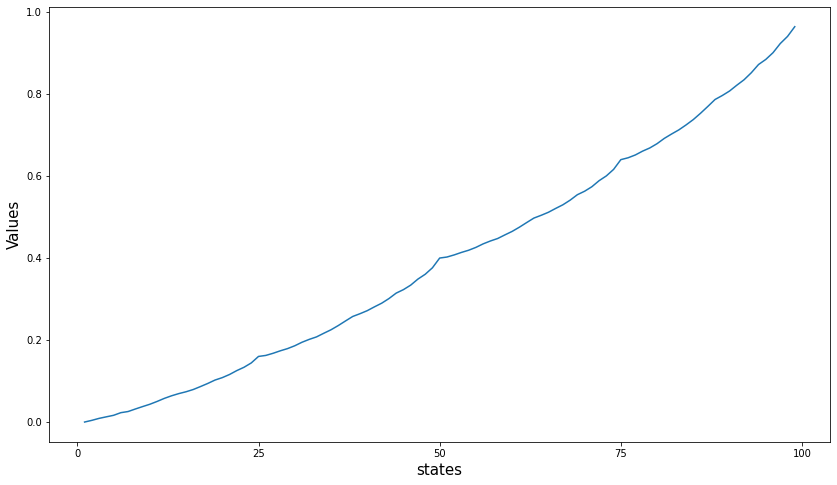

In [565]:
X = []
Y = []
fig, ax = plt.subplots(figsize = (14, 8))
for i in states:
    X.append(i)
    Y.append(V[i])
plt.plot(X, Y)
ax.set_xlabel("states", fontsize = 15)
ax.set_ylabel("Values", fontsize = 15)
ax.set_xticks(ticks=[0, 25, 50, 75, 100])
plt.show()

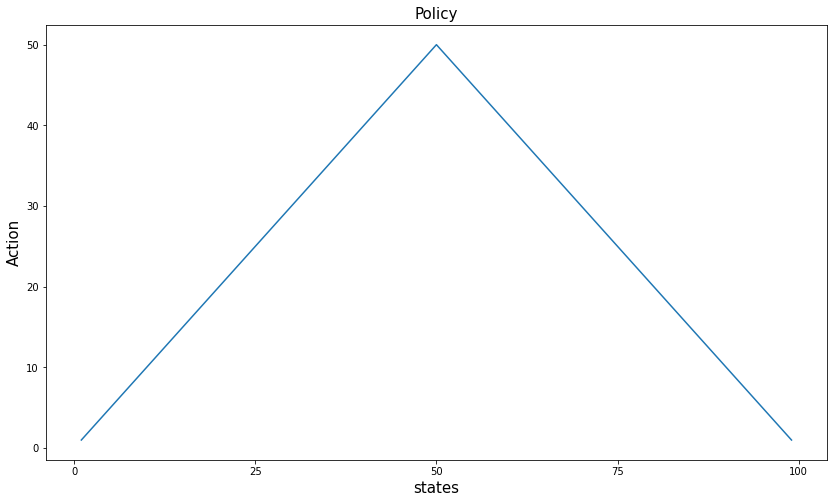

In [566]:
X = []
Y = []
fig, ax = plt.subplots(figsize = (14, 8))
plt.title("Policy", fontsize = 15)
for i in states:
    X.append(i)
    Y.append(P[i])
plt.plot(X, Y)
ax.set_xlabel("states", fontsize = 15)
ax.set_ylabel("Action", fontsize = 15)
ax.set_xticks(ticks=[0, 25, 50, 75, 100])
plt.show()

In [567]:
### determining optimum policy

In [568]:
def get_policy_improvement(V, P, R, states, ph, gamma):
    new_policy = {}
    for s in states:
        possible_actions = get_possible_actions(s)
        max_value = V[s]
        best_action = P[s]
        for a in possible_actions:
            current_action_value = ph * (R[s + a] + gamma * V[s + a]) + (1- ph) * (R[s - a] + gamma * V[s - a])
            if current_action_value > max_value:
                max_value = current_action_value
                best_action = a
        new_policy.update({s : best_action})
    return new_policy

In [569]:
def value_iteration(V, R, states, ph, gamma):
    new_policy = {}
    for s in states:
        possible_actions = get_possible_actions(s)
        max_value = V[s]
        best_action = possible_actions[0]
        for a in possible_actions:
            current_action_value = ph * (R[s + a] + gamma * V[s + a]) + (1- ph) * (R[s - a] + gamma * V[s - a])
            if current_action_value > max_value:
                max_value = current_action_value
                best_action = a
        V[s] = max_value
        new_policy.update({s : best_action})
    return new_policy, V

In [570]:
def get_optimum_policy(V, R, ph, gamma):
    new_policy = {}
    for s in states:
        possible_actions = get_possible_actions(s)
        max_value = V[s]
        best_actions = []
        for a in possible_actions:
            current_action_value = ph * (R[s + a] + gamma * V[s + a]) + (1- ph) * (R[s - a] + gamma * V[s - a])
            if current_action_value >= max_value - :
                best_actions.append(a)
        new_policy.update({s : best_actions})
    return new_policy

In [571]:
V = initialise_values(V, states)
delta = 1
deta_threshold = 0.0001
iteration = 0
while delta > deta_threshold:
    iteration += 1
    V_old = copy.deepcopy(V)
    V = policy_evaluation(V, P, R, states, ph, gamma)
    P = get_policy_improvement(V, P, R, states, ph, gamma)
    V = policy_evaluation(V, P, R, states, ph, gamma)
#     P, V = value_iteration(V, R, states, ph, gamma)
    delta = calculate_delta(V_old, V, states)
    print(iteration, delta)

1 0.96080896
2 0.13926400000000003
3 0.02228224000000001
4 0.0025024266240000013
5 0.0004008311783424007
6 4.971001188188145e-05


In [572]:
Optimum_policies = get_optimum_policy(V, R, ph, gamma)

In [573]:
Optimum_policies[22]

[3, 22]

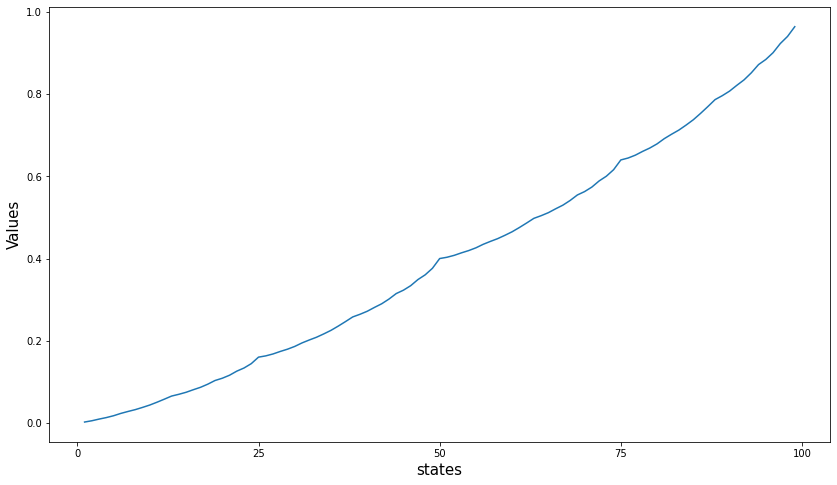

In [574]:
X = []
Y = []
fig, ax = plt.subplots(figsize = (14, 8))
for i in states:
    X.append(i)
    Y.append(V[i])
plt.plot(X, Y)
ax.set_xlabel("states", fontsize = 15)
ax.set_ylabel("Values", fontsize = 15)
ax.set_xticks(ticks=[0, 25, 50, 75, 100])
plt.show()

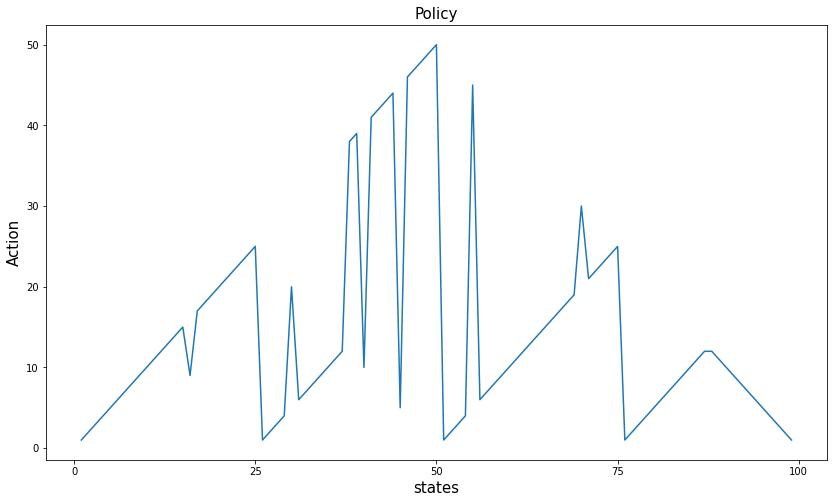

In [575]:
X = []
Y = []
fig, ax = plt.subplots(figsize = (14, 8))
plt.title("Policy", fontsize = 15)
for i in states:
    X.append(i)
    Y.append(P[i])
plt.plot(X, Y)
ax.set_xlabel("states", fontsize = 15)
ax.set_ylabel("Action", fontsize = 15)
ax.set_xticks(ticks=[0, 25, 50, 75, 100])
plt.show()

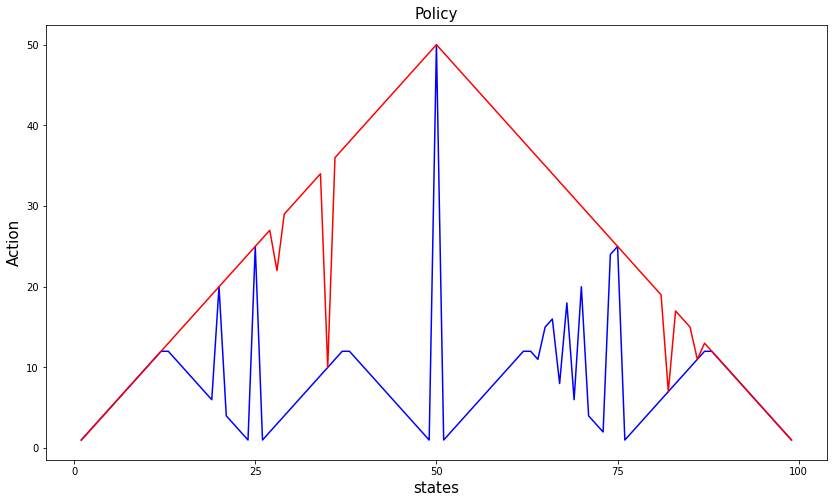

In [576]:
X = []
Y_min = []
Y_max = []
fig, ax = plt.subplots(figsize = (14, 8))
plt.title("Policy", fontsize = 15)
for i in states:
    X.append(i)
    Y_min.append(min(Optimum_policies[i]))
    Y_max.append(max(Optimum_policies[i]))
plt.plot(X, Y_min, color = 'b')
plt.plot(X, Y_max, color = 'r')
ax.set_xlabel("states", fontsize = 15)
ax.set_ylabel("Action", fontsize = 15)
ax.set_xticks(ticks=[0, 25, 50, 75, 100])
plt.show()